# Model training in Python

This notebook analyzes data from measurements of the physical-chemical characteristics of different wines, as well as their quality to train a several models.

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it )
1) Alcohol

2) Malic acid

3) Ash

4) Alcalinity of ash  

5) Magnesium

6) Total phenols

7) Flavanoids

8) Nonflavanoid phenols

9) Proanthocyanins

10)Color intensity

11)Hue

12)OD280/OD315 of diluted wines

13)Proline

Openly available at: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
      

In [147]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

In [148]:
# Load the Wine dataset
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [149]:
# Assign column names
columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
           'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
           'OD280/OD315 of diluted wines', 'Proline']
wine.columns = columns

In [150]:
# Separate features and labels
X = wine.drop('Class', axis=1)
y = wine['Class']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest

In [151]:
# Define a parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [152]:
# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [153]:
# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [154]:
# Evaluate the best model using cross-validation
best_model = grid_search.best_estimator_
cv_scores = cross_val_score(best_model, X, y, cv=5)
print("Cross Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross Validation Scores: [0.97222222 0.94444444 0.97222222 0.97142857 1.        ]
Mean CV Score: 0.9720634920634922


In [155]:
# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

In [156]:
# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

Test Set Accuracy: 1.0


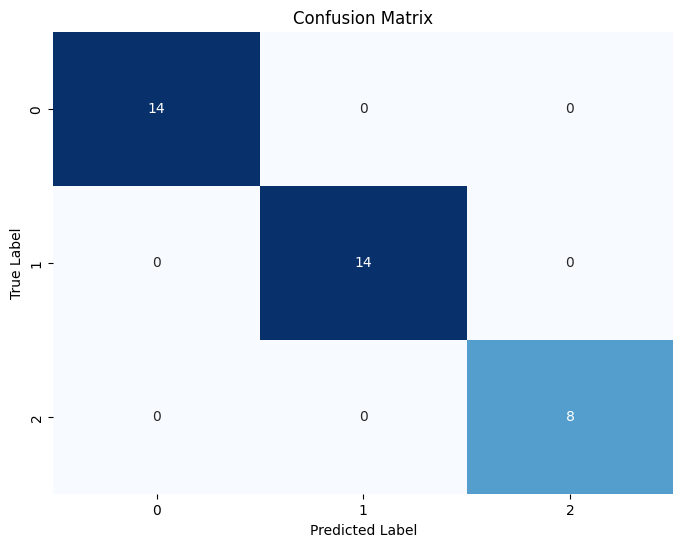

In [157]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# XGBoost

In [158]:
# Define a parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [159]:
# Define an XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

In [160]:
# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]})

In [161]:
# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [162]:
# Evaluate the best model using cross-validation
best_model = grid_search.best_estimator_
cv_scores = cross_val_score(best_model, X, y, cv=5)
print("Cross Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross Validation Scores: [0.97222222 0.91666667 0.91666667 0.97142857 1.        ]
Mean CV Score: 0.9553968253968254


In [163]:
# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

In [164]:
# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

Test Set Accuracy: 1.0


In [165]:
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



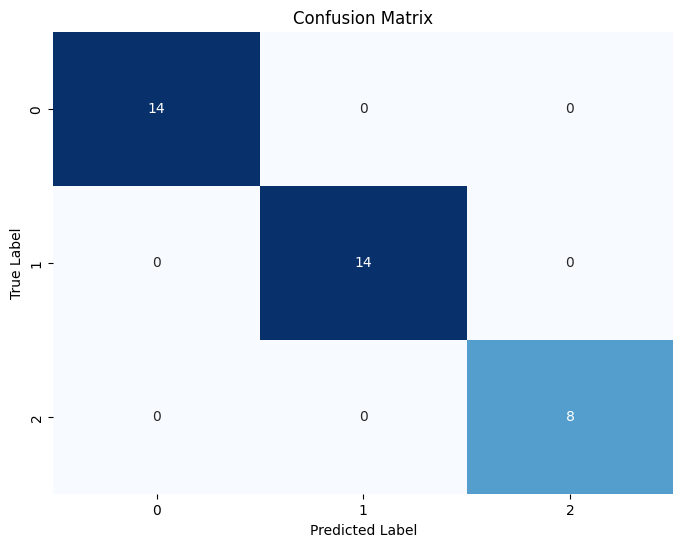

In [166]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Support Vector Classification (SVC

In [167]:
# Define parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [168]:
# Initialize SVC classifier
svc_classifier = SVC(random_state=42)

In [169]:
# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svc_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [170]:
# Print best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [171]:
# Fit the classifier on the training data with the best parameters
best_svc_classifier = grid_search.best_estimator_
best_svc_classifier.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', random_state=42)

In [172]:
# Make predictions on the testing data
y_pred = best_svc_classifier.predict(X_test)

In [173]:
# Calculate accuracy on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [174]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



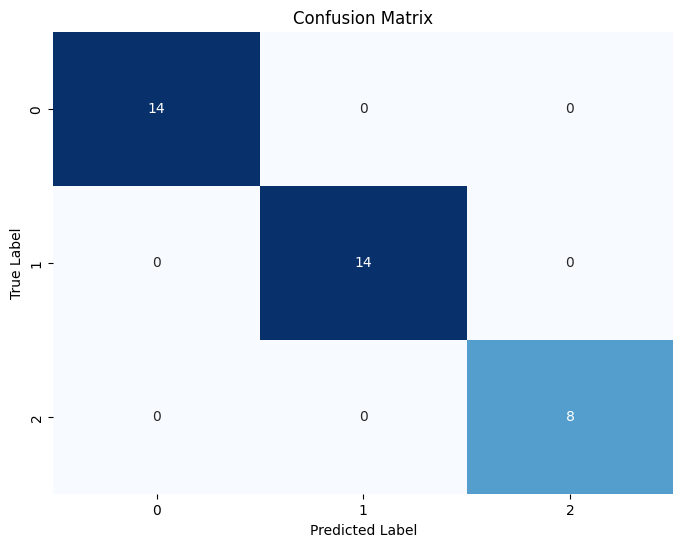

In [175]:
# Print confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#Logistic Regression

In [176]:
# Define parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [177]:
# Initialize Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=10000)

In [178]:
# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=logreg_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']})

In [179]:
# Print best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 1, 'penalty': 'l2'}


In [180]:
# Fit the classifier on the training data with the best parameters
best_logreg_classifier = grid_search.best_estimator_
best_logreg_classifier.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=10000)

In [181]:
# Make predictions on the testing data
y_pred = best_logreg_classifier.predict(X_test)

In [182]:
# Calculate accuracy on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [183]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



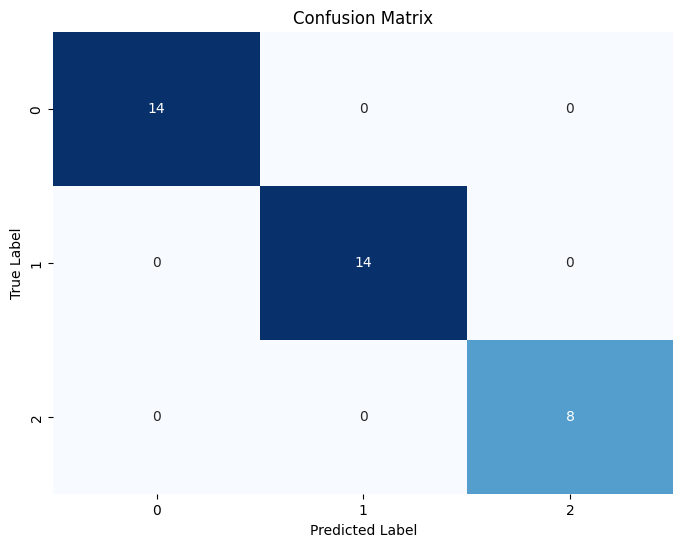

In [184]:
# Print confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()